HAM OR SPAM classification with naive bayes

# NER with Naive Bayes

In [25]:
# installing nltk
!pip install nltk -q

In [29]:
# importing nltk for using it
import nltk
# installing packages from nltk liberary
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# importing necessary liberaries
# data manupulation
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# setting parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

# for model
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# reading the dataset
df = pd.read_csv('Hamspam.csv', encoding='latin-1')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [9]:
# encoding labels by using map method
df['label'] = df['type'].map({'ham': 0,
                              'spam': 1})

In [11]:
df.head()

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1


In [12]:
# storing ham and spam sepepatly
ham = df[df['type'] == 'ham']
spam = df[df['type'] == 'spam']

In [13]:
# only ham messeges
ham

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,0
6,ham,Are you this much buzy,0
...,...,...,...
5552,ham,Already one guy loving you:-.,0
5553,ham,Prepare to be pounded every night...,0
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0


In [14]:
# only spam messeges
spam

,type,text,label
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
8,spam,Marvel Mobile Play the official Ultimate Spide...,1
19,spam,U can WIN å£100 of Music Gift Vouchers every w...,1
34,spam,U have won a nokia 6230 plus a free digital ca...,1
...,...,...,...
5532,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,1
5538,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,1
5551,spam,Ur balance is now å£500. Ur next question is: ...,1
5556,spam,"If you don't, your prize will go to another cu...",1


In [15]:
# I Want to display word cloud then first I need to convert this data into single paragraph
# then I need to display the wordcloud

In [19]:
def wordcl(data, heading):
  txt = ' '.join(data['text'])
  wc = WordCloud(background_color='white', width=700, height=200, colormap='viridis').generate(txt)
  plt.imshow(wc)
  plt.axis('off')
  plt.title(heading)

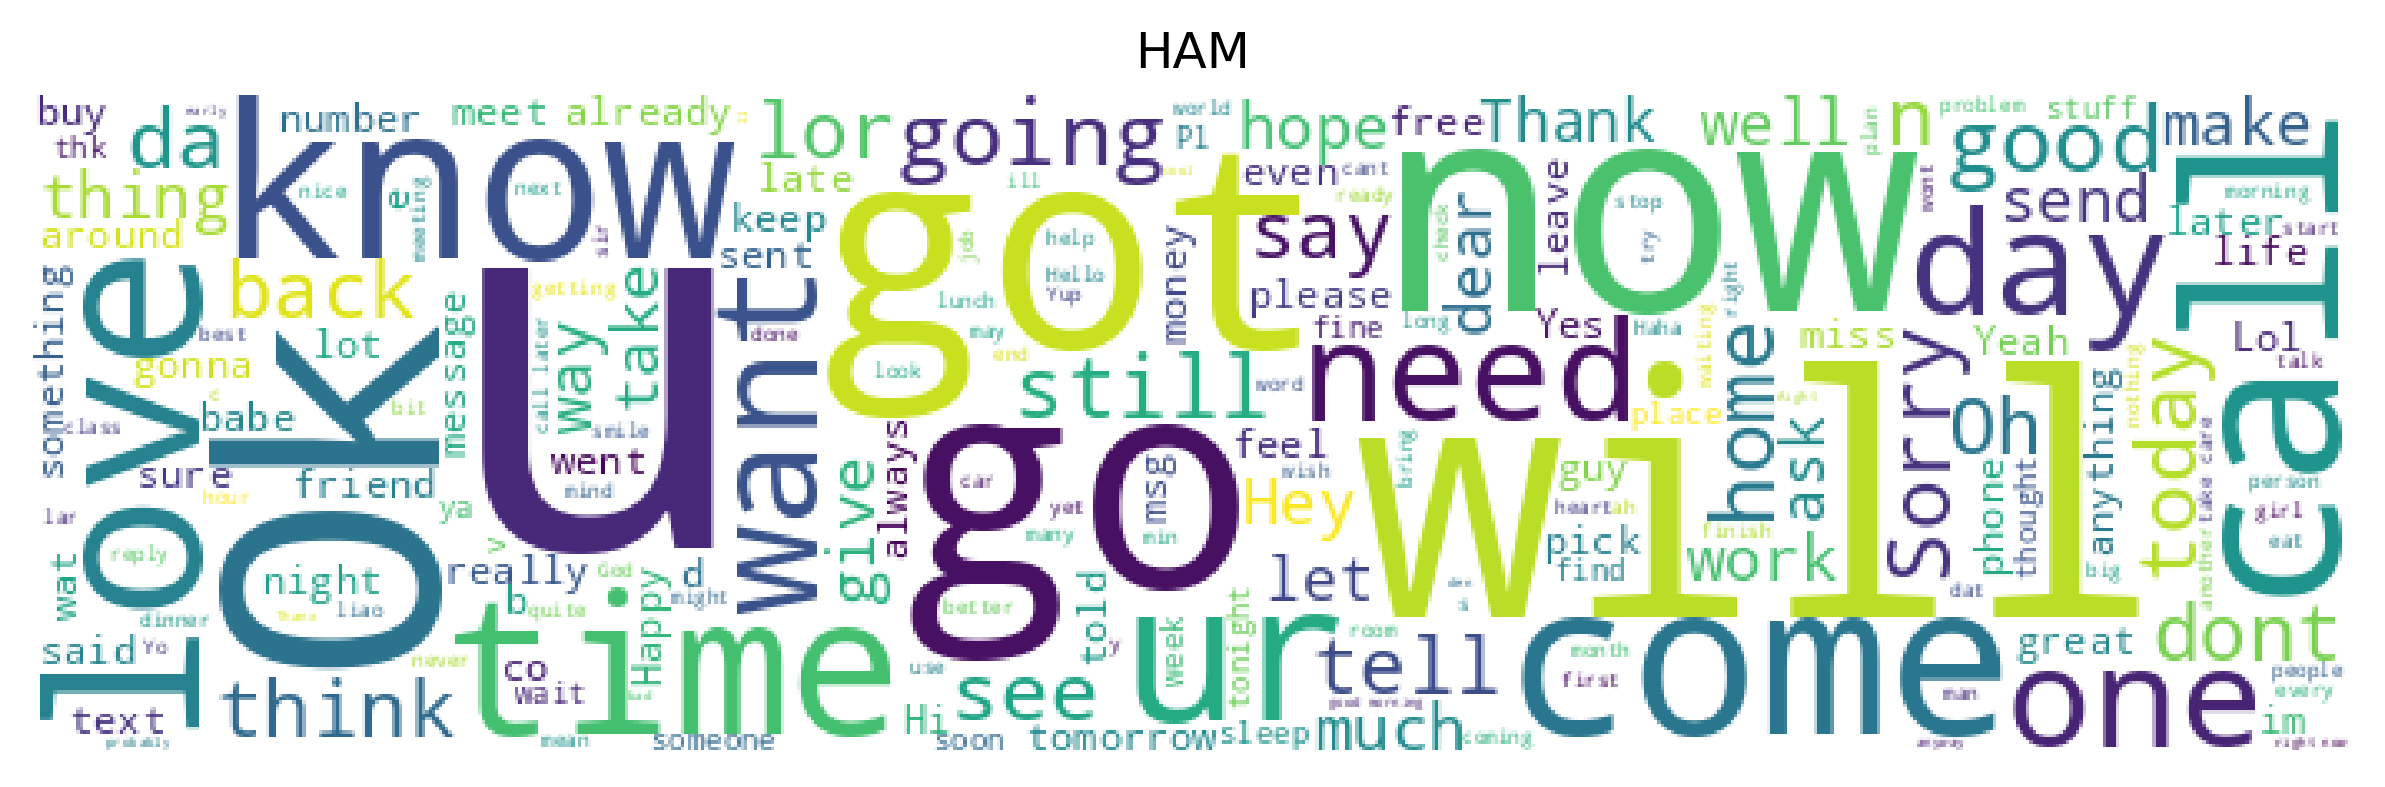

In [20]:
# WORDCLOUD for ham message to see which type of words are most frequent in ham email
wordcl(ham, 'HAM')

In [ ]:
# these are the words that are most frequent in the ham emails

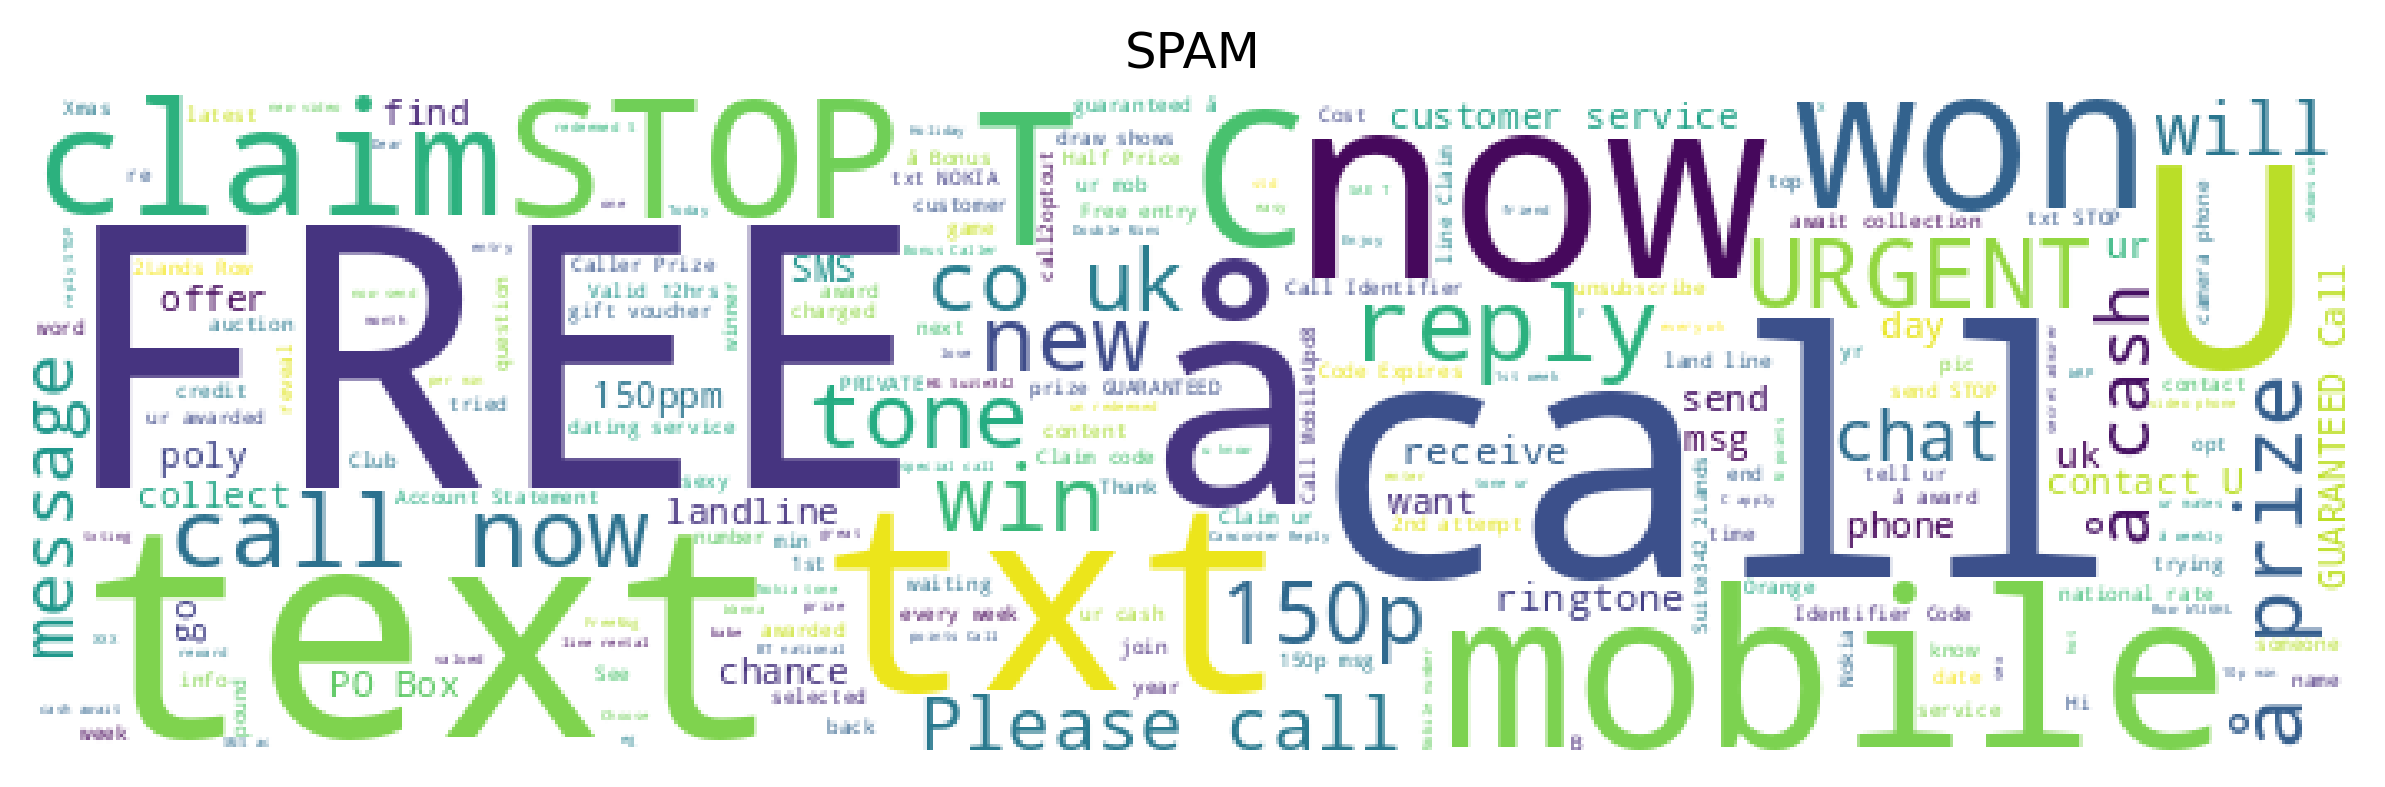

In [21]:
# WORDCLOUD for spam message to see which type of words are most frequent in spam email
wordcl(spam, 'SPAM')

In [ ]:
# these are the words that are most frequent in the spam emails

# TEXT CLEANING
1. removing unwanted words and symbols
2. Text normalization(convert to lower case)
3. Tokenization
4. Lemmatization
5. join the text

In [22]:
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [32]:
# object for class
lemma = WordNetLemmatizer()

In [38]:
# cleaning text by using for loop
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['text'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [40]:
corpus

['hope good week checking',
 'k give back thanks',
 'also cbe pay',
 'complimentary star ibiza holiday cash need urgent collection landline lose box sk wp ppm',
 'okmail dear dave final notice collect tenerife holiday cash award call landline tc sae box cw wx ppm',
 'aiya discus later lar pick u',
 'much buzy',
 'please ask mummy call father',
 'marvel mobile play official ultimate spider man game ur mobile right text spider game send u free ball wallpaper',
 'fyi usf swing room whenever',
 'sure thing big man hockey election go longer hour though',
 'anything lor',
 'march ending ready call sure problem capital never complete far work lady',
 'hmm well night night',
 'k sure get noon see',
 'ha ha cool cool chikku chikku db',
 'darren saying dat u meeting da ge den dun meet dinner co later u leave xy feel awkward den u meet lunch lor',
 'dint tell anything angry told abi',
 'u u wan come come lor din c stripe skirt',
 'u win music gift voucher every week starting txt word draw tscs ww

# MODEL BUILDING

In [35]:
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


<!--  -->

In [36]:
y = df['label']
y

,label
0,0
1,0
2,0
3,1
4,1
...,...
5554,0
5555,0
5556,1
5557,1


In [41]:
# creating objet for the class to apply tfidf
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
# splitting data in training and testing part
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y, test_size=0.20, random_state=1)

# model building

In [43]:
nb = MultinomialNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
print(f'train accuracy: {nb.score(xtrain, ytrain)}\n test accutracy : {nb.score(xtest, ytest)}')

train accuracy: 0.9797616370586912
 test accutracy : 0.9640287769784173


In [ ]:
# I am getting generalised model
# if I give a new email(or piece of text msg) as input to the model then it will predict whether it is spam or ham